# Graph Algorithms with Python


The implementation of Graph Algorithms with Python. As a data scientist, you should be well aware to find relationships among people by using the network they create within each other. So here I will take you through the Graph Algorithms you should know for Data Science using Python.

What are Graph Algorithms?

As machine learning practitioners, we have become quite comfortable with Pandas or SQL or any relational database. We are used to seeing our users in rows with their attributes in columns. But does the real world behave this way?

In a connected world, users cannot be seen as independent entities. They have certain relationships with each other and sometimes we would like to include such relationships when building our machine learning models.


Now, while in a relational database we cannot use such relationships between different users, in a graph database it is quite trivial to do so. In this article, I’m going to talk about some of the most important graphics algorithms you should know about and how to implement them using Python.

You can think of connected components in very simple terms as a kind of hard clustering algorithm that finds clusters in connected data.


As a concrete example: let’s say you have data on the roads connecting two cities in the world. And you have to find out all the continents of the world and what city they contain.


The algorithm of connected components that we use to do this is based on a special case of BFS / DFS. I won’t talk much about how it works here, but we’ll see how to get the code to work with Networkx.


I will be using the Networkx module in Python to build and analyze our graphical algorithms. Let’s start with an example chart that we use for our purpose. Contains cities and distance information between them.

# Graph Algorithms: Connected Components


In [28]:

from PIL import Image
image = Image.open('graph.png')
image.show()

In [1]:
# for some basic operations
import numpy as np 
import pandas as pd 

# for basic visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for network visualizations
import networkx as nx

## Getting Started with the Types of Graph

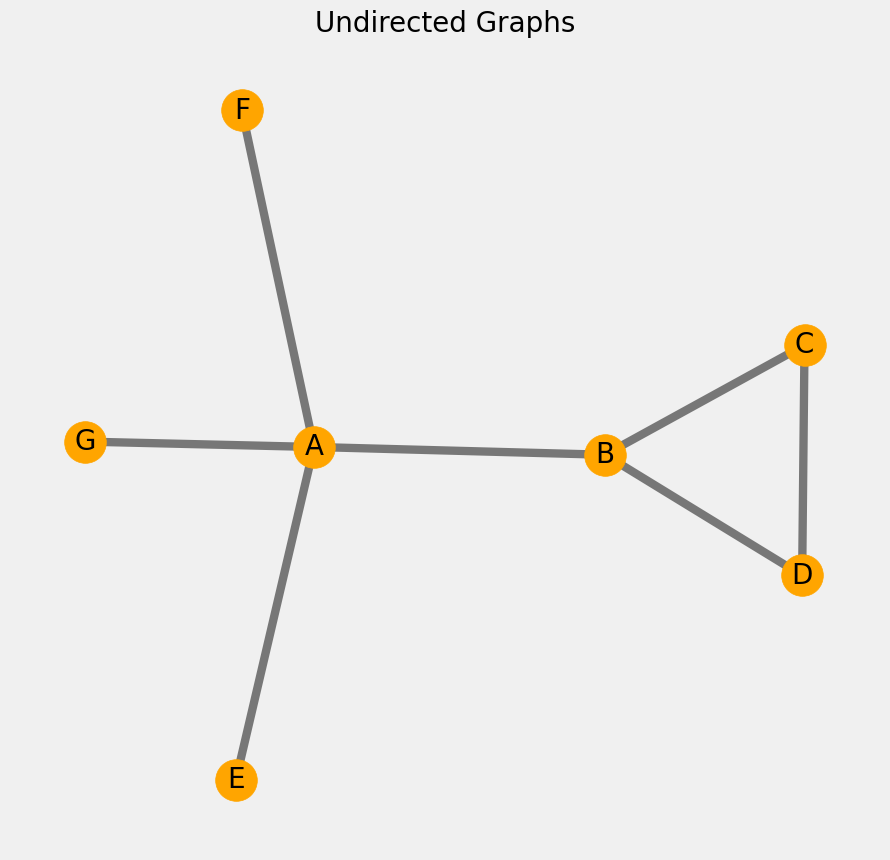

In [2]:
# Undirected Graphs

g = nx.Graph()
g.add_edge('A', 'B')
g.add_edge('B', 'C')
g.add_edge('C', 'D')
g.add_edge('B', 'D')
g.add_edge('A', 'E')
g.add_edge('A', 'F')
g.add_edge('A', 'G')

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fivethirtyeight')

pos = nx.spring_layout(g)

# drawing nodes
nx.draw_networkx_nodes(g, pos, node_size = 900, node_color = 'orange')

# drawing edges
nx.draw_networkx_edges(g, pos, width = 6, alpha = 0.5, edge_color = 'black')

# labels
nx.draw_networkx_labels(g, pos, font_size = 20, font_family = 'sans-serif')

plt.title('Undirected Graphs', fontsize = 20)
plt.axis('off')
plt.show()

* An undirected graph is graph, i.e., a set of objects (called vertices or nodes) that are connected together, where all the edges are bidirectional. An undirected graph is sometimes called an undirected network. In contrast, a graph where the edges point in a direction is called a directed graph.

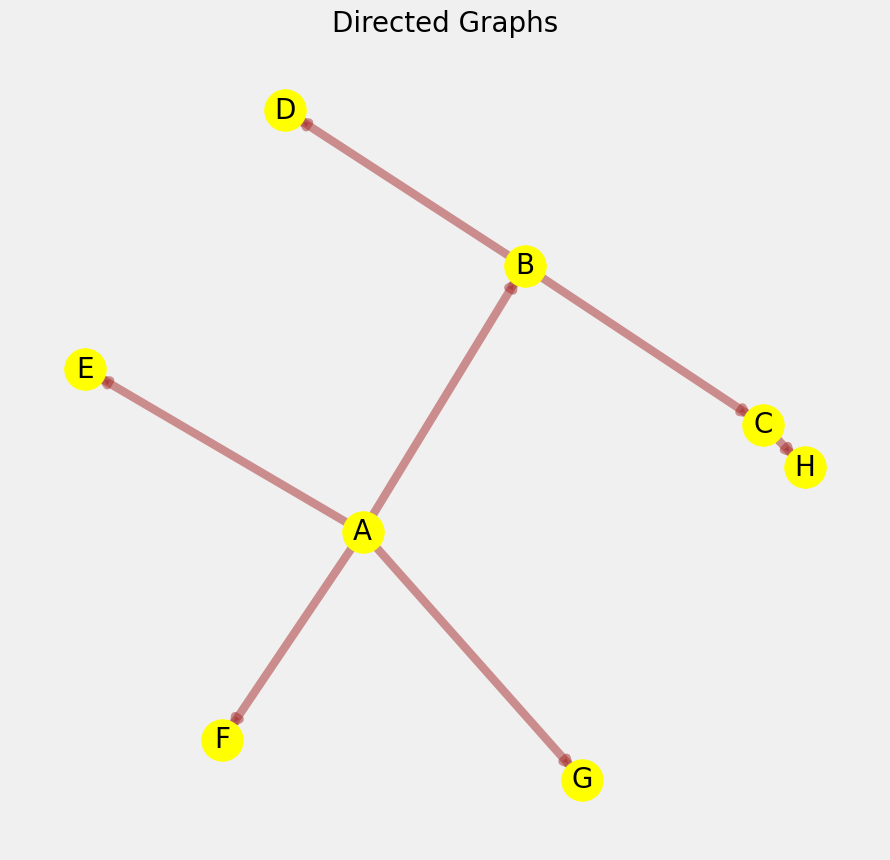

In [3]:
# Directed Graphs

g = nx.DiGraph()
g.add_edge('A', 'B')
g.add_edge('B', 'C')
g.add_edge('C', 'H')
g.add_edge('B', 'D')
g.add_edge('A', 'E')
g.add_edge('A', 'F')
g.add_edge('A', 'G')

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fivethirtyeight')

pos = nx.spring_layout(g)

# drawing nodes
nx.draw_networkx_nodes(g, pos, node_size = 900, node_color = 'yellow')

# drawing edges
nx.draw_networkx_edges(g, pos, edge_color = 'brown', width = 6, alpha = 0.5)

# defining labels
nx.draw_networkx_labels(g, pos, font_size=20, font_family='sans-serif')

plt.title('Directed Graphs', fontsize = 20)
plt.axis('off')
plt.show()


* A directed graph is graph, i.e., a set of objects (called vertices or nodes) that are connected together, where all the edges are directed from one vertex to another. A directed graph is sometimes called a digraph or a directed network.

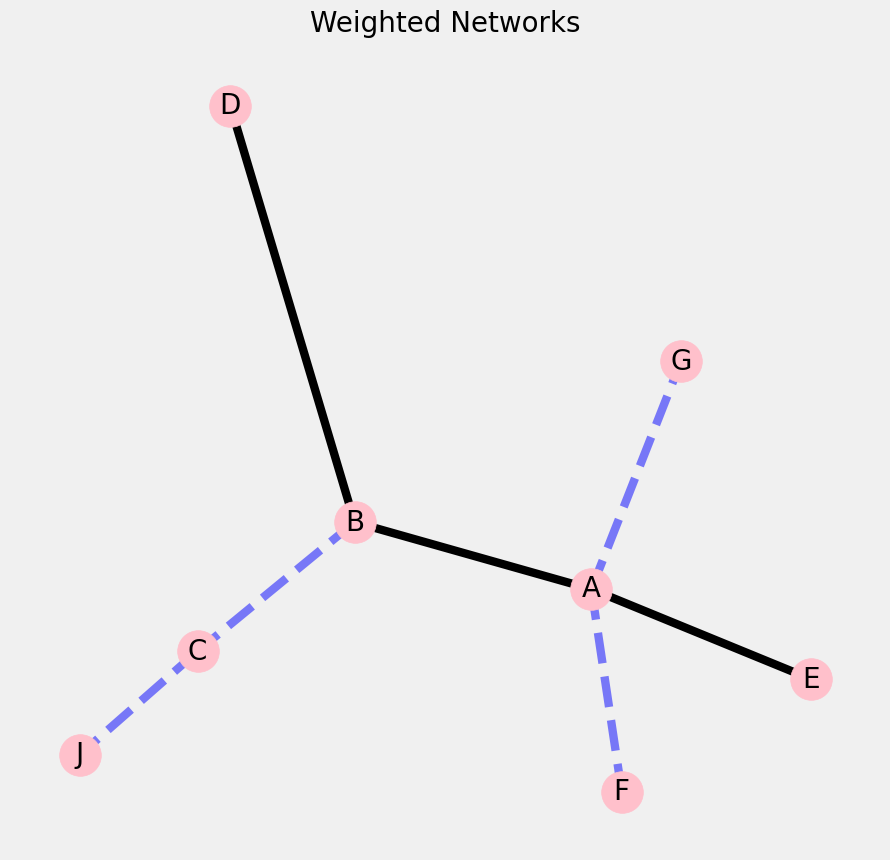

In [4]:
# weighted networks

# Undirected Graphs

g = nx.Graph()
g.add_edge('A', 'B', weight = 8)
g.add_edge('B', 'C', weight = 12)
g.add_edge('C', 'J', weight = 15)
g.add_edge('B', 'D', weight = 3)
g.add_edge('A', 'E', weight = 5)
g.add_edge('A', 'F', weight = 18)
g.add_edge('A', 'G', weight = 10)

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fivethirtyeight')
plt.title('Weighted Networks', fontsize = 20)

elarge = [(u, v) for (u, v, d) in g.edges(data=True) if d['weight'] <  10]
esmall = [(u, v) for (u, v, d) in g.edges(data=True) if d['weight'] >= 10]

pos = nx.spring_layout(g)  

# nodes
nx.draw_networkx_nodes(g, pos, node_size = 900, node_color = 'pink')

# edges
nx.draw_networkx_edges(g, pos, edgelist = elarge, width = 6)
nx.draw_networkx_edges(g, pos, edgelist = esmall, width = 6, alpha = 0.5, edge_color = 'b', style = 'dashed')

# labels
nx.draw_networkx_labels(g, pos, font_size = 20, font_family = 'sans-serif')

plt.axis('off')
plt.show()

* A weighted graph is a graph in which each branch is given a numerical weight. A weighted graph is therefore a special type of labeled graph in which the labels are numbers (which are usually taken to be positive). SEE ALSO: Labeled Graph, Taylor's Condition, Weighted Tree.

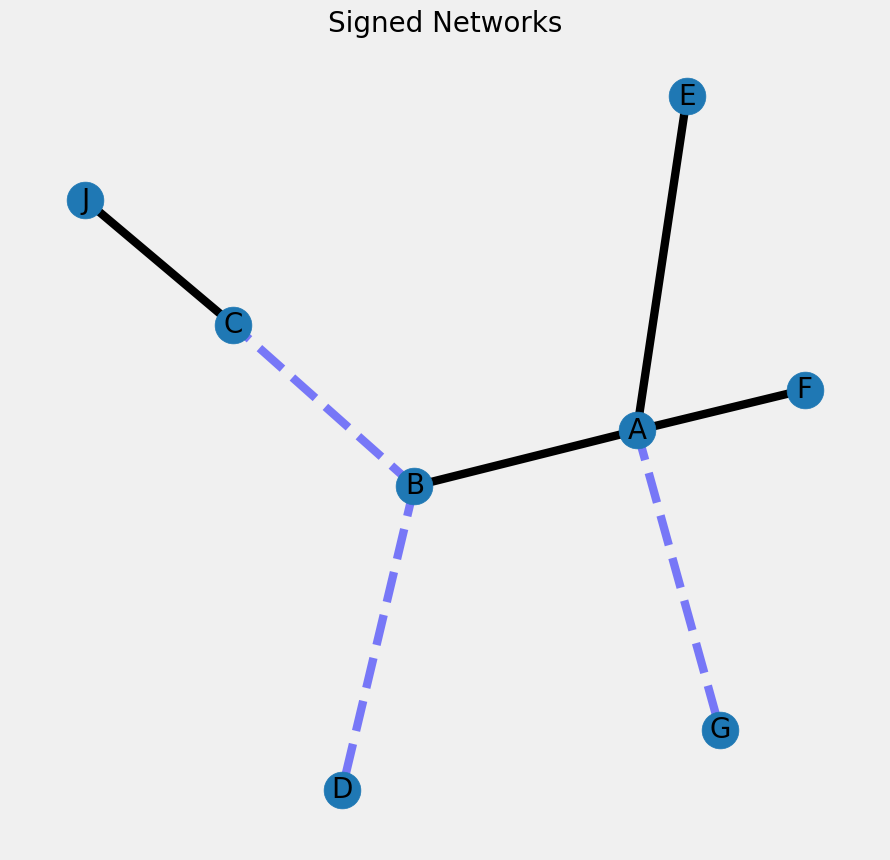

In [5]:
# signed networks

# Undirected Graphs

g = nx.Graph()
g.add_edge('A', 'B', sign = '+')
g.add_edge('B', 'C', sign = '-')
g.add_edge('C', 'J', sign = '+')
g.add_edge('B', 'D', sign = '-')
g.add_edge('A', 'E', sign = '+')
g.add_edge('A', 'F', sign = '+')
g.add_edge('A', 'G', sign = '-')

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fivethirtyeight')
plt.title('Signed Networks', fontsize = 20)

elarge = [(u, v) for (u, v, d) in g.edges(data=True) if d['sign'] == '+']
esmall = [(u, v) for (u, v, d) in g.edges(data=True) if d['sign'] == '-']

pos = nx.spring_layout(g)  

# nodes
nx.draw_networkx_nodes(g, pos, node_size=700)

# edges
nx.draw_networkx_edges(g, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(g, pos, edgelist=esmall,
                       width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(g, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

* In the area of graph theory in mathematics, a signed graph is a graph in which each edge has a positive or negative sign. A signed graph is balanced if the product of edge signs around every cycle is positive. Three fundamental questions about a signed graph are: Is it balanced?

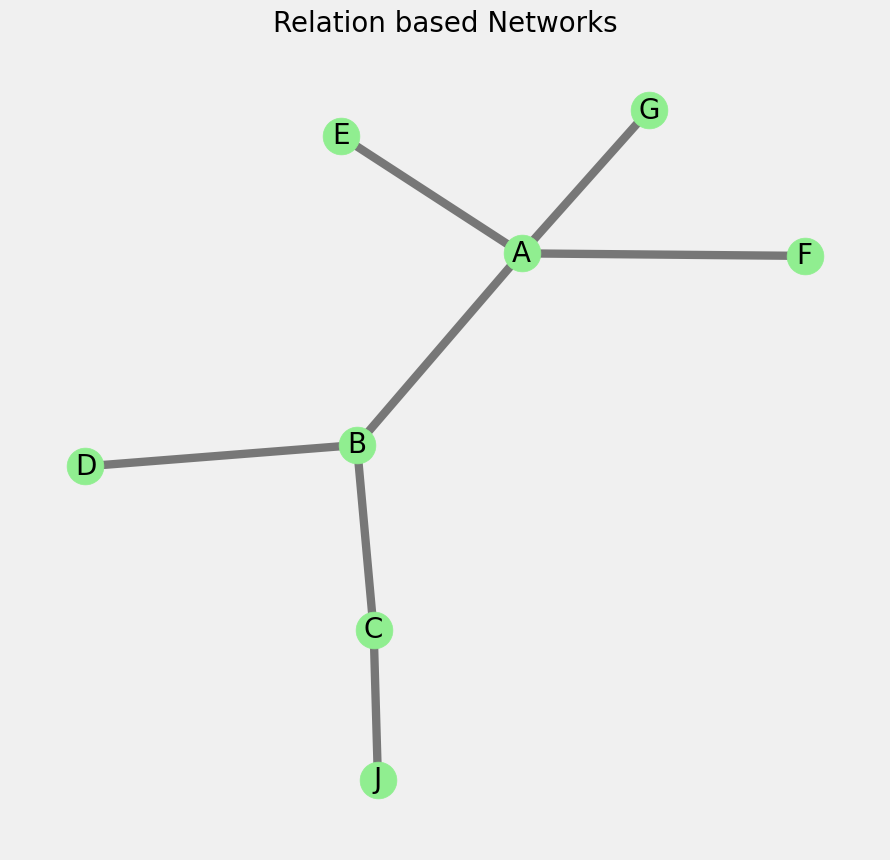

In [6]:
# relation networks

# Undirected Graphs

g = nx.Graph()
g.add_edge('A', 'B', relation = 'family')
g.add_edge('B', 'C', relation = 'friend')
g.add_edge('C', 'J', relation = 'coworker')
g.add_edge('B', 'D', relation = 'family')
g.add_edge('A', 'E', relation = 'friend')
g.add_edge('A', 'F', relation = 'coworker')
g.add_edge('A', 'G', relation = 'friend')

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fivethirtyeight')
plt.title('Relation based Networks', fontsize = 20)

pos = nx.spring_layout(g)  

# nodes
nx.draw_networkx_nodes(g, pos, node_size = 700, node_color = 'lightgreen')

# edges
nx.draw_networkx_edges(g, pos, width = 6, alpha = 0.5, edge_color = 'black')

# labels
nx.draw_networkx_labels(g, pos, font_size = 20, font_family = 'sans-serif')

plt.axis('off')
plt.show()

### Checking the different types of Layouts available in Networkx

In [7]:
# See what layouts are available in networkX

[x for x in nx.__dir__() if x.endswith('_layout')]

['bipartite_layout',
 'circular_layout',
 'kamada_kawai_layout',
 'random_layout',
 'rescale_layout',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'planar_layout',
 'fruchterman_reingold_layout',
 'spiral_layout',
 'multipartite_layout']

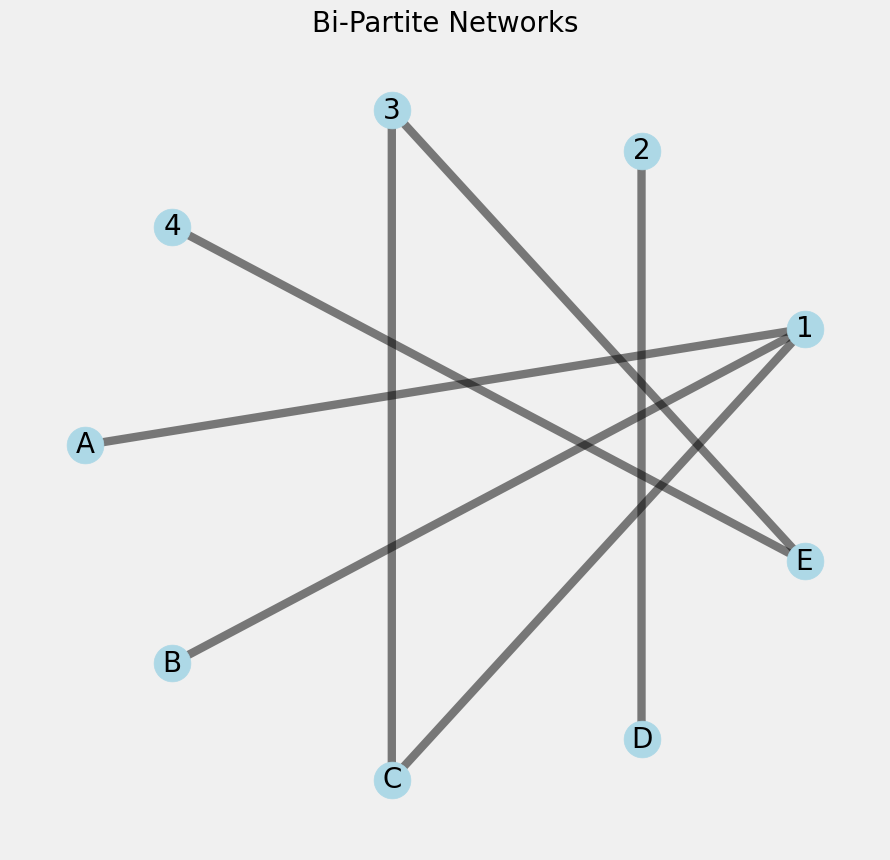

In [8]:
# bipartite graphs

from networkx.algorithms import bipartite

B = nx.Graph()

B.add_nodes_from(['A','B','C','D','E'], bipartite = 0)
B.add_nodes_from([1, 2, 3, 4], bipartite = 1)
B.add_edges_from([('A', 1),('B', 1),('C', 1),('C', 3),('D', 2),('E',3),('E',4)])

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fivethirtyeight')
plt.title('Bi-Partite Networks', fontsize = 20)

pos = nx.shell_layout(B)  

# nodes
nx.draw_networkx_nodes(B, pos, node_size = 700, node_color = 'lightblue')

# edges
nx.draw_networkx_edges(B, pos, width = 6, alpha = 0.5, edge_color = 'black')

# labels
nx.draw_networkx_labels(B, pos, font_size = 20, font_family = 'sans-serif')

plt.axis('off')
plt.show()

* In the mathematical field of graph theory, a bipartite graph is a graph whose vertices can be divided into two disjoint and independent sets and such that every edge connects a vertex in to one in. Vertex sets and are usually called the parts of the grap

In [9]:
# we can also check whether a graph is bipartite or not

bipartite.is_bipartite(B)

True

In [10]:
# checking if a set of nodes is a bipartition of a graph

X = set([1, 2, 3, 4])
bipartite.is_bipartite_node_set(B, X)

True

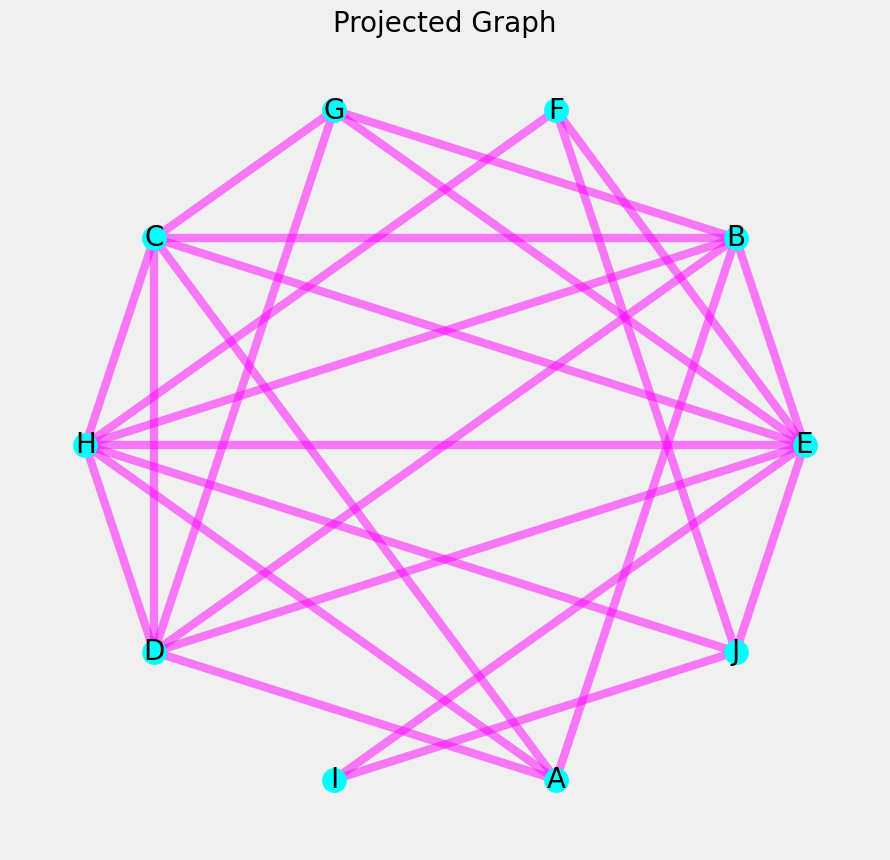

In [11]:
# projected graphs

B = nx.Graph()
B.add_edges_from([('A', 1),('B', 1),('C', 1),('D', 1),('H', 1),('B', 2),('C', 2),('D', 1),
                 ('H', 1),('B', 2),('C', 2),('D', 2),('E', 2),('G', 2),('E', 3),('F', 3),
                 ('H', 3), ('J', 3), ('E', 4), ('I',4), ('J', 4)])

X = set(['A','B','C','D','E','F','G','H','I','J'])
P = bipartite.projected_graph(B, X)

pos = nx.circular_layout(P)

nx.draw_networkx_nodes(P, pos, node_color = 'cyan')

nx.draw_networkx_edges(P, pos, edge_color = 'magenta', width = 6, alpha = 0.5)

nx.draw_networkx_labels(P, pos, font_size = 20, font_family = 'sans-serif')

plt.title('Projected Graph', fontsize = 20)
plt.axis('off')
plt.show()

* Breadth-first search is an algorithm for traversing or searching tree or graph data structures. It starts at the tree root, and explores all of the neighbor nodes at the present depth prior to moving on to the nodes at the next depth level

In [13]:
a = nx.Graph()

a.add_edge('A', 'B')
a.add_edge('A', 'K')
a.add_edge('B', 'C')
a.add_edge('C', 'F')
a.add_edge('F', 'E')
a.add_edge('F', 'G')
a.add_edge('C', 'E')
a.add_edge('E', 'D')
a.add_edge('E', 'H')
a.add_edge('K', 'B')
a.add_edge('E', 'I')
a.add_edge('I', 'J')

a = nx.bfs_tree(a, 'A')
pos = nx.kamada_kawai_layout(a)
nx.draw_networkx(a, size = 100)
plt.axis('off')
plt.title('BFS Tree')
plt.show()

ValueError: Received invalid argument(s): size

In [14]:
# let's check the edges of the tree

a.edges()

OutEdgeView([('A', 'B'), ('A', 'K'), ('B', 'C'), ('C', 'F'), ('C', 'E'), ('F', 'G'), ('E', 'D'), ('E', 'H'), ('E', 'I'), ('I', 'J')])

In [15]:
# let's check the shortest path from A

nx.shortest_path_length(a, 'A')

{'A': 0,
 'K': 1,
 'B': 1,
 'C': 2,
 'F': 3,
 'E': 3,
 'H': 4,
 'G': 4,
 'I': 4,
 'D': 4,
 'J': 5}

In [16]:
# checking the average shortest path length

nx.average_shortest_path_length(a)

0.6545454545454545

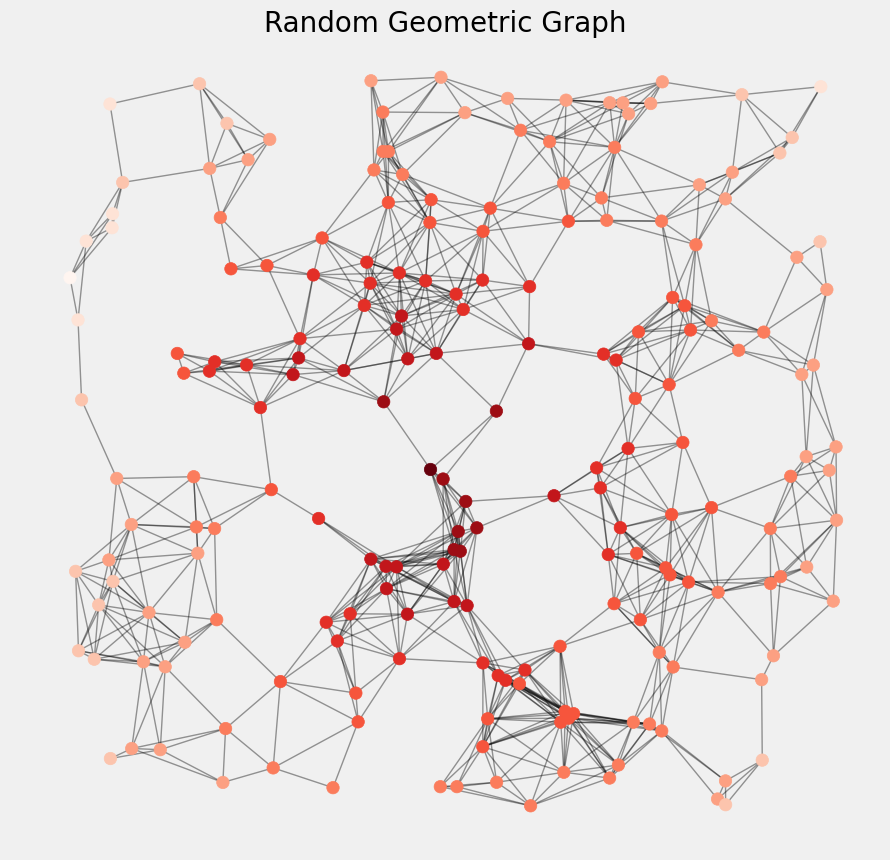

In [17]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.random_geometric_graph(200, 0.125)
# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G, 'pos')

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5)**2 + (y - 0.5)**2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))

plt.rcParams['figure.figsize'] = (10, 10)
nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.4)
nx.draw_networkx_nodes(G, pos, nodelist=list(p.keys()),
                       node_size=80,
                       node_color=list(p.values()),
                       cmap=plt.cm.Reds_r)

plt.title('Random Geometric Graph', fontsize = 20)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis('off')
plt.show()

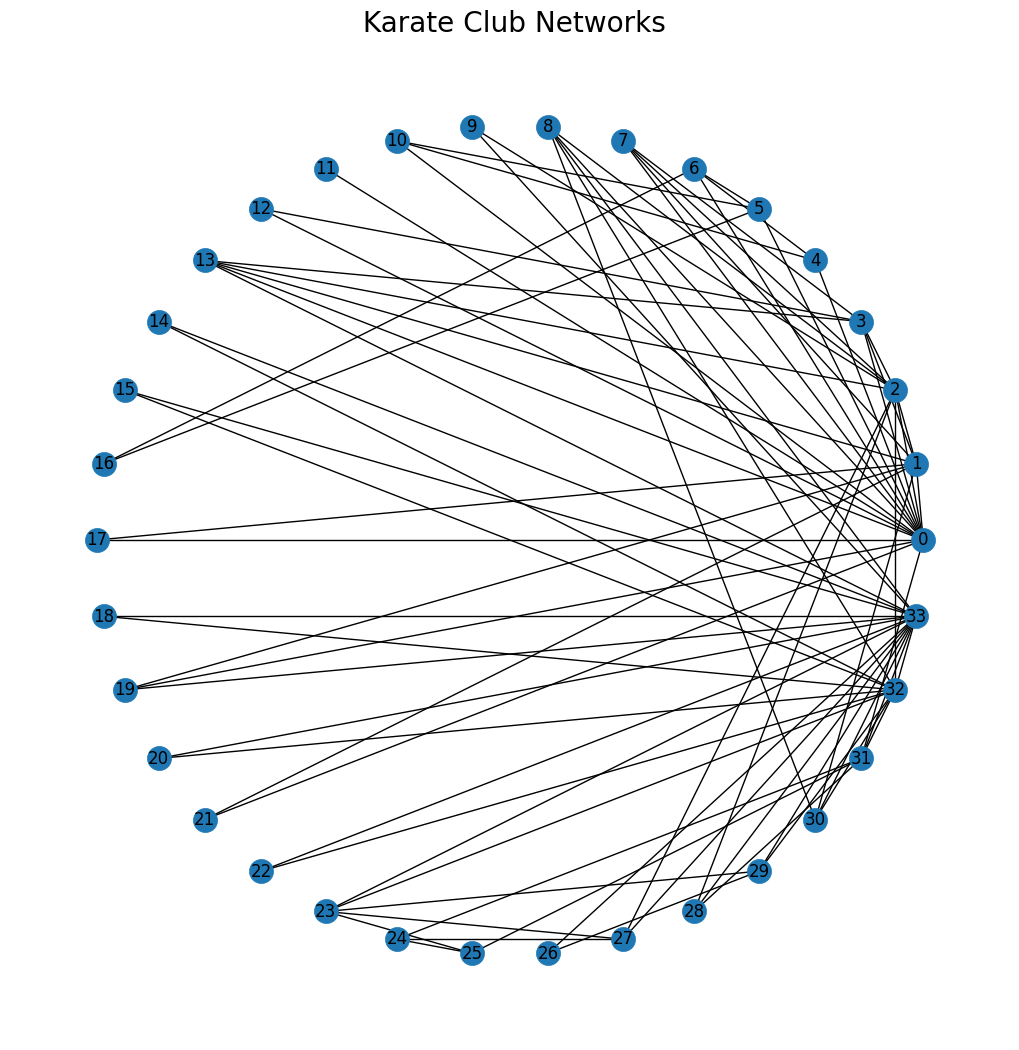

In [18]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.karate_club_graph()

plt.style.use('fivethirtyeight')
nx.draw_circular(G, with_labels=True)

plt.title(' Karate Club Networks')
plt.show()

## Facebook Network Analysis

In [21]:
# reading the dataset

fb = nx.read_edgelist('facebook-combined.txt', create_using = nx.Graph(), nodetype = int)

In [22]:
print(nx.info(fb))

Graph with 4039 nodes and 88234 edges


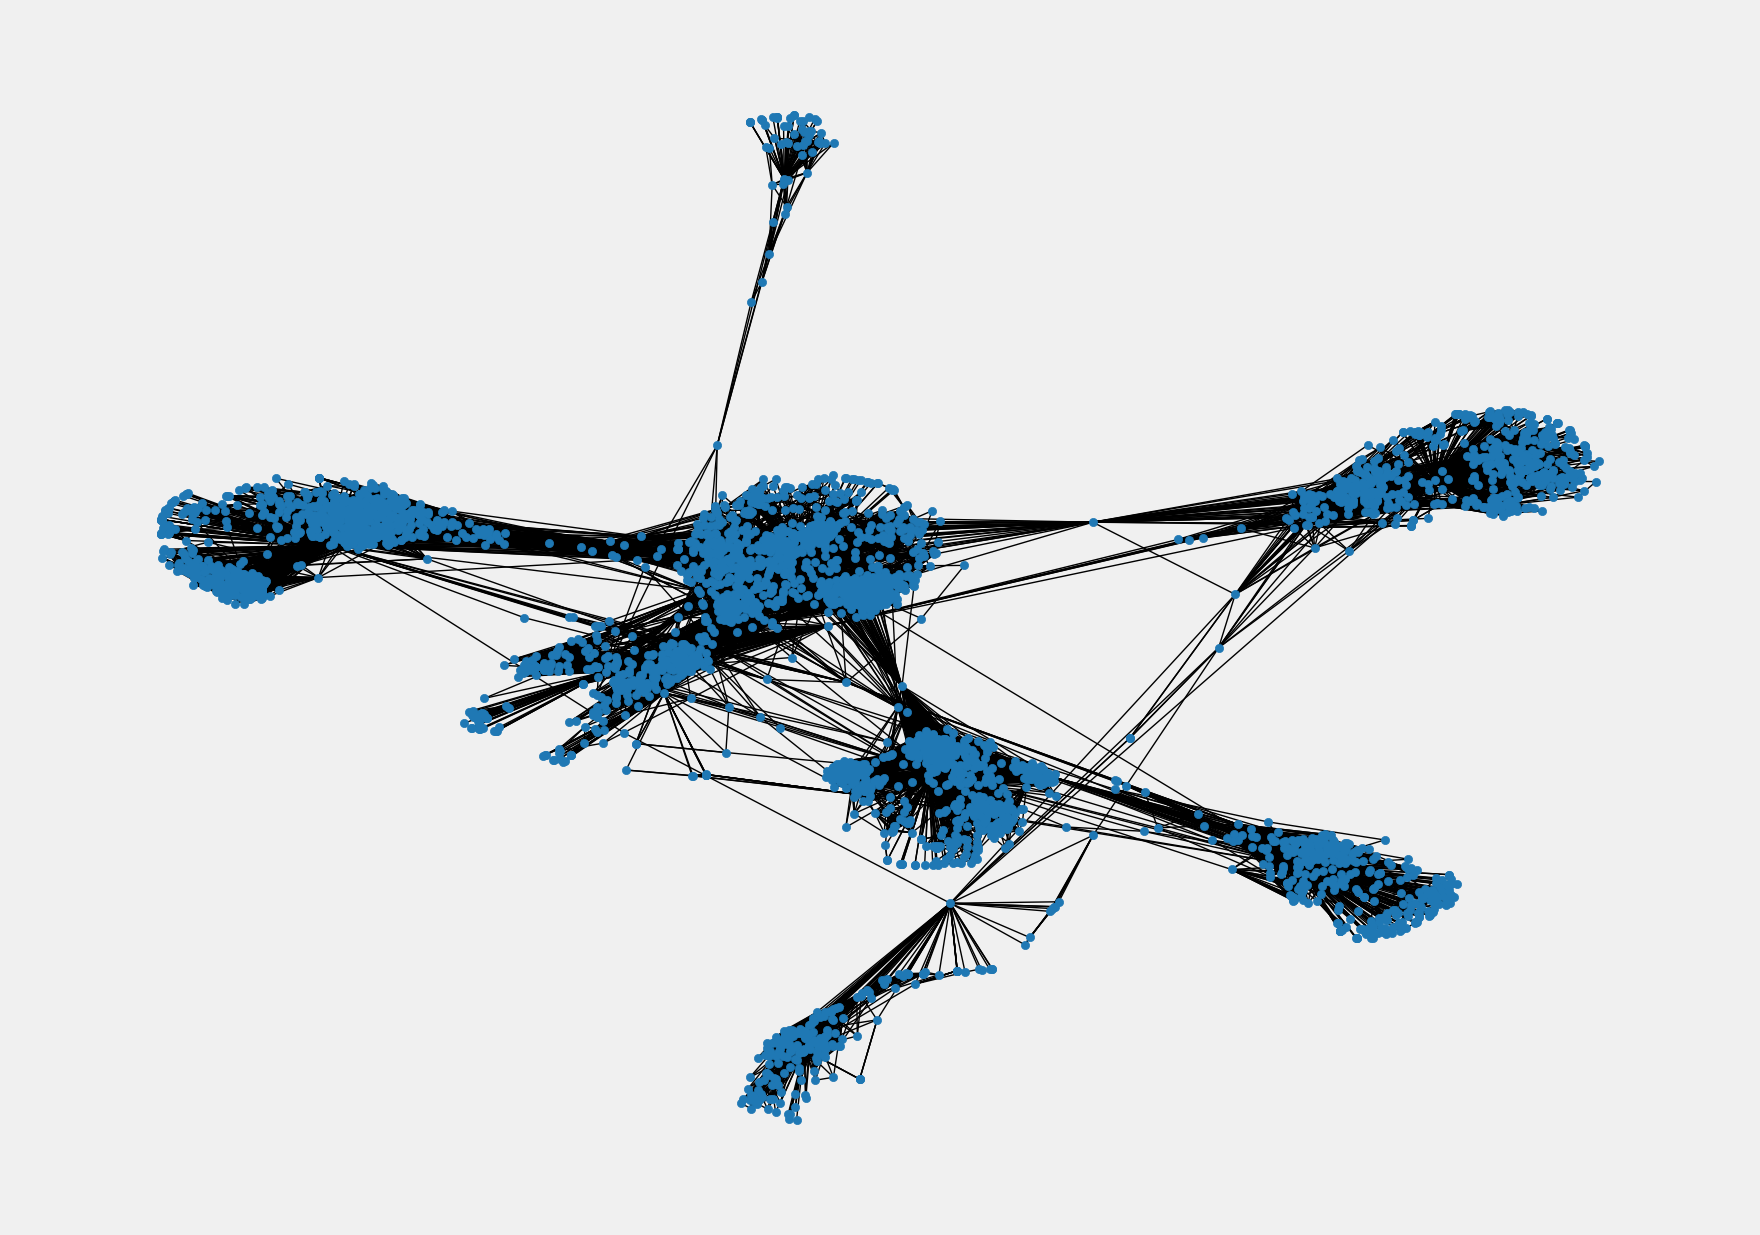

In [23]:
pos = nx.spring_layout(fb)

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
plt.axis('off')
nx.draw_networkx(fb, pos, with_labels = False, node_size = 35)
plt.show()

In [22]:
# checking the betweenness centrality 

bc = nx.betweenness_centrality(fb)
bc

{0: 0.14630592147442917,
 1: 2.7832744209034606e-06,
 2: 7.595021178512074e-08,
 3: 1.6850656559280464e-06,
 4: 1.8403320547933104e-07,
 5: 2.205964164092193e-06,
 6: 2.4537760730577472e-08,
 7: 0.0001702984836730339,
 8: 2.7604980821899654e-07,
 9: 1.6454236303026905e-05,
 10: 4.986739552037655e-08,
 11: 0.0,
 12: 0.0,
 13: 1.7622717578436846e-06,
 14: 5.582871686568508e-07,
 15: 0.0,
 16: 1.9979459275532697e-07,
 17: 4.1066669000480344e-07,
 18: 0.0,
 19: 5.062957964075819e-06,
 20: 6.793693332142838e-07,
 21: 0.0009380243844653233,
 22: 6.703002200833232e-07,
 23: 6.860348937590618e-06,
 24: 1.3673472422981514e-07,
 25: 5.38808313945586e-05,
 26: 1.935436798204632e-05,
 27: 3.067220091322184e-08,
 28: 3.812160659244892e-07,
 29: 1.3954817951917517e-06,
 30: 1.3694627409316544e-06,
 31: 4.932641252790837e-06,
 32: 0.0,
 33: 0.0,
 34: 0.0036020881281963652,
 35: 0.0,
 36: 2.726417858953052e-08,
 37: 0.0,
 38: 7.344481172858835e-07,
 39: 9.548632622274015e-07,
 40: 1.3796059569123122e-

In [23]:
# checking the degree of each node in the network

degree = nx.degree_histogram(fb)
degree

[0,
 75,
 98,
 93,
 99,
 93,
 98,
 98,
 111,
 100,
 95,
 81,
 82,
 79,
 87,
 106,
 82,
 76,
 73,
 72,
 63,
 52,
 63,
 53,
 60,
 55,
 56,
 49,
 37,
 38,
 40,
 38,
 44,
 35,
 43,
 36,
 43,
 43,
 44,
 29,
 27,
 29,
 21,
 29,
 21,
 19,
 24,
 24,
 24,
 33,
 25,
 20,
 19,
 15,
 23,
 23,
 18,
 23,
 15,
 11,
 18,
 18,
 16,
 23,
 13,
 20,
 22,
 13,
 16,
 14,
 17,
 18,
 15,
 10,
 10,
 8,
 15,
 10,
 11,
 16,
 8,
 4,
 12,
 17,
 12,
 10,
 9,
 5,
 9,
 9,
 7,
 9,
 10,
 11,
 7,
 9,
 11,
 8,
 5,
 11,
 10,
 4,
 9,
 6,
 6,
 7,
 9,
 9,
 6,
 9,
 4,
 1,
 7,
 8,
 4,
 10,
 6,
 9,
 0,
 4,
 5,
 6,
 12,
 11,
 9,
 5,
 6,
 4,
 5,
 4,
 6,
 6,
 4,
 3,
 3,
 7,
 4,
 5,
 2,
 5,
 3,
 7,
 7,
 0,
 1,
 3,
 5,
 6,
 3,
 1,
 2,
 5,
 4,
 2,
 4,
 5,
 6,
 1,
 5,
 3,
 6,
 4,
 2,
 1,
 4,
 5,
 4,
 2,
 5,
 3,
 3,
 3,
 3,
 6,
 2,
 2,
 4,
 4,
 5,
 3,
 2,
 2,
 5,
 3,
 3,
 4,
 4,
 4,
 4,
 3,
 6,
 4,
 2,
 3,
 1,
 4,
 2,
 3,
 5,
 2,
 1,
 4,
 2,
 2,
 1,
 4,
 0,
 3,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,

In [24]:
print(fb.order())
print(fb.size())

4039
88234


Graph Algorithms: Centrality Measures

There are many metrics of centrality that you can use as functionality for your machine learning models. I’ll talk about two of them:

Centrality between the two: 

It is not only the users who have the most friends that are important, the users who connect one geography to another are also important because it allows users to see content from various geographies. The centrality of the in-between quantifies the number of times a particular node arrives in the shortest path chosen between two other nodes.

Degree of centrality: 

this is simply the number of connections for a node.
The centrality measures can be used as a feature in machine learning models:

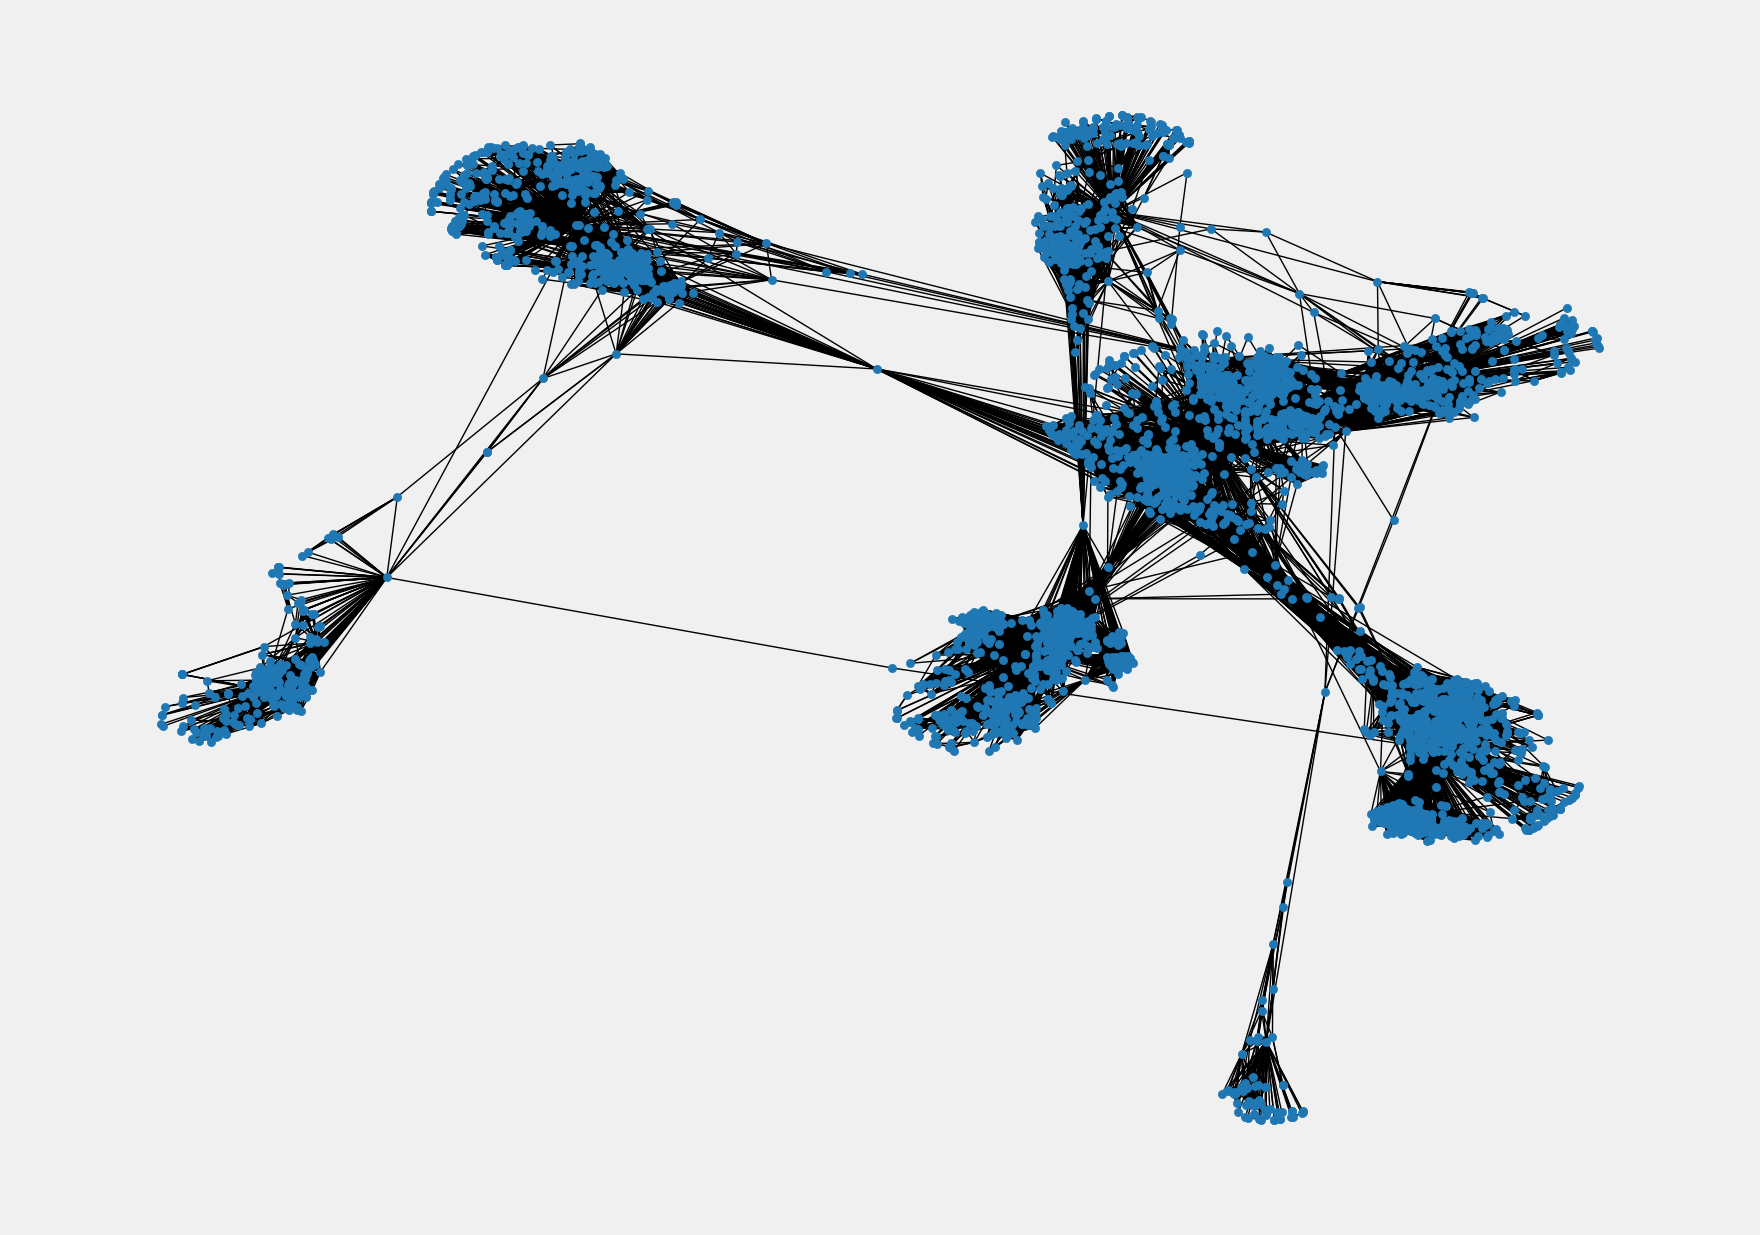

In [25]:
pos = nx.spring_layout(fb)
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
plt.axis('off')
nx.draw_networkx(fb, pos, with_labels = False, node_size = 35)
plt.show()

You can see the nodes sized based on their centrality values between the two here. They can be considered as information brokers. Breaking one of the nodes with high centrality between the two will split the graph into several parts